# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Windi Sri Rahayu]
- **Email:** [windyrahayu45@gmail.com]
- **ID Dicoding:** [ayuuwindii]

## Menentukan Pertanyaan Bisnis

- Apa saja polutan utama yang berkontribusi terhadap buruknya kualitas udara?
- Bagaimana kualitas udara berubah seiring dengan kondisi cuaca dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [16]:
df = pd.read_csv('./data/PRSA_Data_Wanliu_20130301-20170228.csv')
print(df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4  1025.2 -19.5   0.0    N   2.0  Wanliu  


**Insight:**
- PM10, SO2, NO2, CO, O3: Beberapa nilai untuk polutan lainnya juga tercatat, dengan beberapa nilai kosong (NaN) pada SO2 dan O3 di beberapa entri. Penting untuk memeriksa frekuensi dan pola kekosongan data ini.
- Suhu tercatat bervariasi antara -2.0 hingga -0.7 °C selama periode ini. Suhu yang rendah ini mungkin berkontribusi pada kondisi udara yang lebih bersih, tetapi dapat mempengaruhi konsentrasi polutan tertentu seperti PM2.5 yang mungkin lebih terperangkap di dekat permukaan dalam suhu yang lebih dingin.
- Data ini mencakup pengukuran yang dilakukan pada jam-jam berbeda, dan pola fluktuasi sepanjang hari dapat memberikan wawasan lebih lanjut. Misalnya, apakah kualitas udara lebih buruk pada jam sibuk ketika lebih banyak kendaraan di jalan.

### Assessing Data

In [17]:

df_head = df.head()
df_info = df.info()
print(df.describe())
missing_values = df.isnull().sum()
descriptive_stats = df.describe()

df_head, missing_values, descriptive_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
                 No          year         month           day       

(   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
 1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
 2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
 3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
 4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   
 
      PRES  DEWP  RAIN   wd  WSPM station  
 0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
 1  1023.2 -18.2   0.0    N   4.7  Wanliu  
 2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
 3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
 4  1025.2 -19.5   0.0    N   2.0  Wanliu  ,
 No            0
 year          0
 month         0
 day           0
 hour          0
 PM2.5       382
 PM10        284
 SO2         575
 NO2        1070
 CO         1812
 O3         2107
 TEMP         20
 PRES         20
 DEWP         20
 RAIN         20
 wd          123

**Insight:**
- Dari total 35064 entri, beberapa kolom memiliki nilai yang hilang (non-null count yang lebih rendah dari 35064).
PM2.5: Terdapat 382 nilai yang hilang.
PM10: Terdapat 284 nilai yang hilang.
SO2: Terdapat 575 nilai yang hilang.
NO2: Terdapat 1070 nilai yang hilang.
CO: Terdapat 1802 nilai yang hilang.
O3: Terdapat 2107 nilai yang hilang.
Ini menunjukkan bahwa ada kemungkinan untuk melakukan imputasi atau penanganan data hilang sebelum melakukan analisis lebih lanjut.


### Cleaning Data

In [18]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Verify that missing values are handled
print(df.isnull().sum())

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         123
WSPM         0
station      0
dtype: int64


In [19]:
# Gabungkan kolom tahun, bulan, hari, dan jam menjadi kolom datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Set kolom datetime sebagai index (opsional)
df.set_index('datetime', inplace=True)


**Insight:**
- Setelah menerapkan metode imputasi median untuk kolom numerik, jumlah nilai hilang yang tersisa bervariasi dari 0 (untuk kolom tahun, bulan, hari, dan jam) hingga beberapa ribu (untuk PM2.5, CO, O3, dan lainnya).
- Analisis Korelasi: Menghitung koefisien korelasi antara polutan dan kondisi cuaca untuk memahami hubungan lebih dalam.


## Exploratory Data Analysis (EDA)

In [20]:
# Melihat deskripsi statistik
print(df.describe())

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      83.109169    110.282666     18.239118     65.098314   1297.682609   
std       81.497468     92.440427     22.448715    

In [21]:
# Create a pivot table to explore average PM10 levels by year and month
pivot_pm10 = df.pivot_table(values='PM10', index='year', columns='month', aggfunc='mean')

# Display the pivot table for average PM105 levels
pivot_pm10

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,NaN,NaN,145.277554,108.370833,129.958333,114.130556,80.274194,85.693548,102.356944,126.795699,112.988889,116.013441
2014,141.514785,159.302083,150.721774,157.913889,132.475941,86.483333,121.961022,103.449731,96.844722,157.581989,144.174306,108.139113
2015,126.096774,127.058036,151.878091,122.894444,94.713710,83.148194,79.219086,66.145161,65.683333,87.151882,118.290278,156.985215
2016,81.822581,55.586207,137.525538,103.606944,71.520161,75.540278,79.814516,57.837366,66.798611,99.784946,134.772222,146.588710
2017,133.209677,85.653274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Create a pivot table to explore average PM2.5 levels by year and month
pivot_pm25 = df.pivot_table(values='PM2.5', index='year', columns='month', aggfunc='mean')

# Display the pivot table for average PM2.5 levels
pivot_pm25

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,NaN,NaN,110.272849,66.376389,92.922043,120.305556,75.778226,67.025538,86.768056,103.926075,87.273611,104.205645
2014,109.951613,153.892857,98.669355,92.525000,63.566935,56.331944,91.168011,66.066129,66.166944,122.646505,92.500972,61.015457
2015,97.744086,93.065476,84.581855,73.209722,58.673387,61.661111,63.928763,47.028226,50.075000,69.215054,113.331944,150.131720
2016,66.935484,43.251437,93.627688,62.150000,52.654570,58.372222,70.681452,45.163978,53.602778,81.806452,98.801389,126.064516
2017,115.626344,69.513393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Create a pivot table to explore average SO2 levels by year and month
pivot_so2 = df.pivot_table(values='SO2', index='year', columns='month', aggfunc='mean')

# Display the pivot table for average SO2 levels
pivot_so2

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,NaN,NaN,43.353043,25.786644,24.674731,19.555250,9.262866,15.703474,13.324430,22.409726,21.647222,39.753935
2014,59.193548,60.995536,41.412634,18.183333,16.578495,7.779167,11.409946,9.445565,10.308889,11.513441,19.292361,31.327419
2015,38.131989,29.901786,22.983468,10.766667,9.459677,8.370833,5.362903,3.217742,4.805556,5.572581,13.347222,25.295699
2016,23.180108,18.387931,19.963710,9.952778,8.235215,5.250000,2.918011,2.387097,3.198611,3.422043,10.613889,20.045699
2017,20.209677,20.154762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Create a pivot table to explore average NO2 levels by year and month
pivot_no2 = df.pivot_table(values='NO2', index='year', columns='month', aggfunc='mean')

# Display the pivot table for average NO2 levels
pivot_no2

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,NaN,NaN,88.263351,72.333156,70.142473,67.086061,54.461291,57.325492,67.587059,75.518684,58.364381,73.363452
2014,91.454301,110.538690,93.602151,80.598611,63.950941,51.695833,53.721774,58.919624,65.516250,91.290323,78.230972,62.452957
2015,77.286425,72.933036,85.133065,59.848611,47.653226,42.030556,40.735215,33.106183,43.552778,55.547043,64.597222,79.923387
2016,58.533602,43.205460,79.446237,57.261111,48.236559,49.427778,42.557796,43.115591,49.668056,62.577957,75.154167,91.052419
2017,75.016129,62.281250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Create a pivot table to explore average CO levels by year and month
pivot_co = df.pivot_table(values='CO', index='year', columns='month', aggfunc='mean')

# Display the pivot table for average CO levels
pivot_co

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,NaN,NaN,1621.081989,912.152778,961.385753,1615.344444,843.268817,797.983871,1066.245833,1200.940860,1372.083333,1510.349462
2014,2430.510753,2402.380952,1547.580645,970.972222,865.994624,734.305556,802.553763,745.698925,878.750000,1273.655914,1882.222222,1843.951613
2015,2246.236559,1729.017857,1282.258065,749.027778,740.994624,1292.361111,893.279570,803.629032,811.805556,867.338710,1947.361111,2570.967742
2016,2133.736559,786.781609,1253.763441,759.583333,646.639785,749.583333,809.139785,798.387097,789.583333,1136.827957,1985.138889,2850.806452
2017,2118.817204,1299.702381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Create a pivot table to explore average O3 levels by year and month
pivot_o3 = df.pivot_table(values='O3', index='year', columns='month', aggfunc='mean')

# Display the pivot table for average O3 levels
pivot_o3

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,NaN,NaN,39.420794,50.561048,63.931864,60.665334,65.900798,69.003397,41.013209,26.730111,29.241659,22.006843
2014,25.032258,16.065476,32.849462,46.052778,70.510081,77.711111,81.083333,71.563978,35.616111,14.504032,12.270833,16.698387
2015,11.307796,21.247024,30.785618,60.055556,96.708333,95.131944,105.131720,89.060484,49.073611,31.818548,11.265278,13.420699
2016,24.001344,46.224138,44.500000,68.758333,91.986559,99.895833,84.741935,72.029570,50.815278,20.650538,16.369444,16.766129
2017,30.481183,41.479167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
## Polutan Status
pollutant_stats = df.groupby('year').agg({
    'PM2.5': ['nunique', 'count', 'mean', 'min', 'max'],
    'PM10': ['nunique', 'count', 'mean', 'min', 'max'],
    'SO2':  ['nunique', 'count', 'mean', 'min', 'max'],
    'NO2':  ['nunique', 'count', 'mean', 'min', 'max'],
    'CO':   ['nunique', 'count', 'mean', 'min', 'max'],
    'O3':   ['nunique', 'count', 'mean', 'min', 'max']
})
print(pollutant_stats)


       PM2.5                                 PM10                         \
     nunique count       mean  min    max nunique count        mean  min   
year                                                                       
2013     385  7344  91.502451  3.0  560.0     396  7344  112.221609  2.0   
2014     445  8760  89.151644  3.0  589.0     514  8760  129.901701  3.0   
2015     426  8760  80.176884  3.0  718.0     483  8760  106.536986  3.0   
2016     390  8784  71.276070  3.0  957.0     433  8784   92.773907  3.0   
2017     322  1416  93.742232  2.0  625.0     338  1416  110.640537  4.0   

             ...      CO                                         O3        \
        max  ... nunique count         mean    min      max nunique count   
year         ...                                                            
2013  829.0  ...     102  7344  1189.412173  100.0  10000.0     664  7344   
2014  923.0  ...      81  8760  1359.075342  100.0   9600.0     263  8760   
2015  

In [28]:
# Group the weather data by year and calculate aggregate statistics
weather_stats = df.groupby('year').agg({
    'TEMP': ['mean', 'min', 'max'],
    'PRES': ['mean', 'min', 'max'],
    'WSPM': ['mean', 'min', 'max']
})

print(weather_stats)


           TEMP                     PRES                      WSPM           
           mean   min   max         mean     min     max      mean  min   max
year                                                                         
2013  15.497740  -9.4  37.9  1008.200408   985.9  1031.3  1.532761  0.0   8.3
2014  13.878402 -12.2  40.5  1011.311313   987.7  1036.0  1.475160  0.0   9.1
2015  13.355939 -10.9  39.0  1011.258231   986.0  1036.7  1.485765  0.0  11.2
2016  13.405566 -15.8  38.2  1011.311755   988.2  1040.3  1.465460  0.0   6.8
2017   0.525730 -10.2  16.2  1022.473576  1000.4  1035.0  1.813206  0.0   8.6


## Visualization & Explanatory Analysis

### Pertanyaan 1:

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      83.109169    110.282666     18.239118     65.098314   1297.682609   
std       81.497468     92.440427     22.448715     37.422775   1238.397180   
min        2.000000      2.000000      0.285600      1.642400    100.000000   
25%       24.000000     40.000000      4.000000     37.000000    600.000000   
50%       59.000000     88.000000     10.000000     60.000000    900.000000   
75%      115.000000    152.000000     22.276800     87.000000   1500.000000   
max      957.000000    951.000000    282.000000    264.000000  10000.000000   

                 O3  
count  35064.000000  
mean      47.859676  
std       53.580480  
min        0.214200  
25%        4.000000  
50%       32.000000  
75%       70.000000  
max      364.000000  


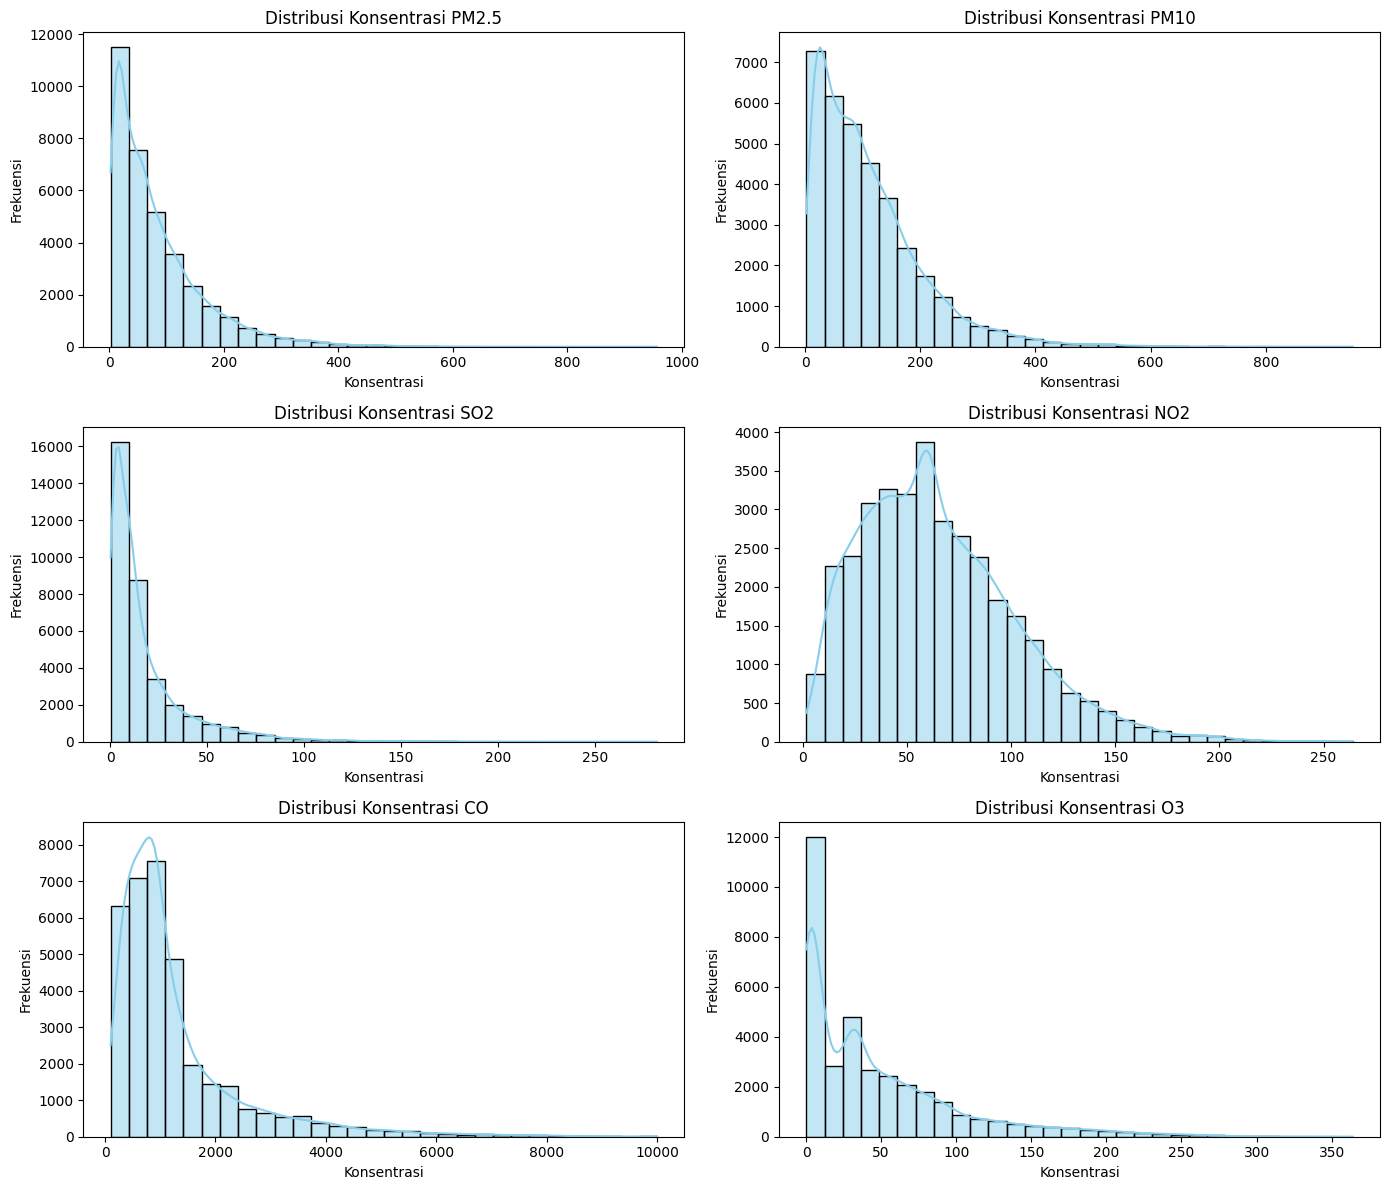

In [29]:
# Kolom polutan
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

# Statistik deskriptif
print(df[pollutants].describe())

# Visualisasi distribusi polutan
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()
for i, pollutant in enumerate(pollutants):
    sns.histplot(df[pollutant], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribusi Konsentrasi {pollutant}')
    axes[i].set_xlabel('Konsentrasi')
    axes[i].set_ylabel('Frekuensi')
plt.tight_layout()
plt.show()


Korelasi Antar Polutan: Periksa korelasi antara polutan untuk mengetahui apakah ada polutan yang saling memengaruhi satu sama lain. Jika korelasinya tinggi, polutan ini mungkin sama-sama berkontribusi pada kualitas udara.

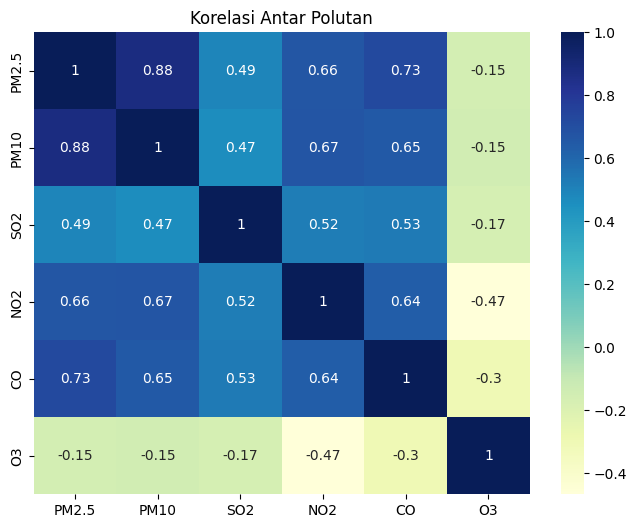

In [30]:
# Korelasi antara polutan
correlation_matrix = df[pollutants].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Korelasi Antar Polutan')
plt.show()


### Pertanyaan 2:

<ipython-input-31-fa4296af19b7>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df[pollutants].resample('M').mean()


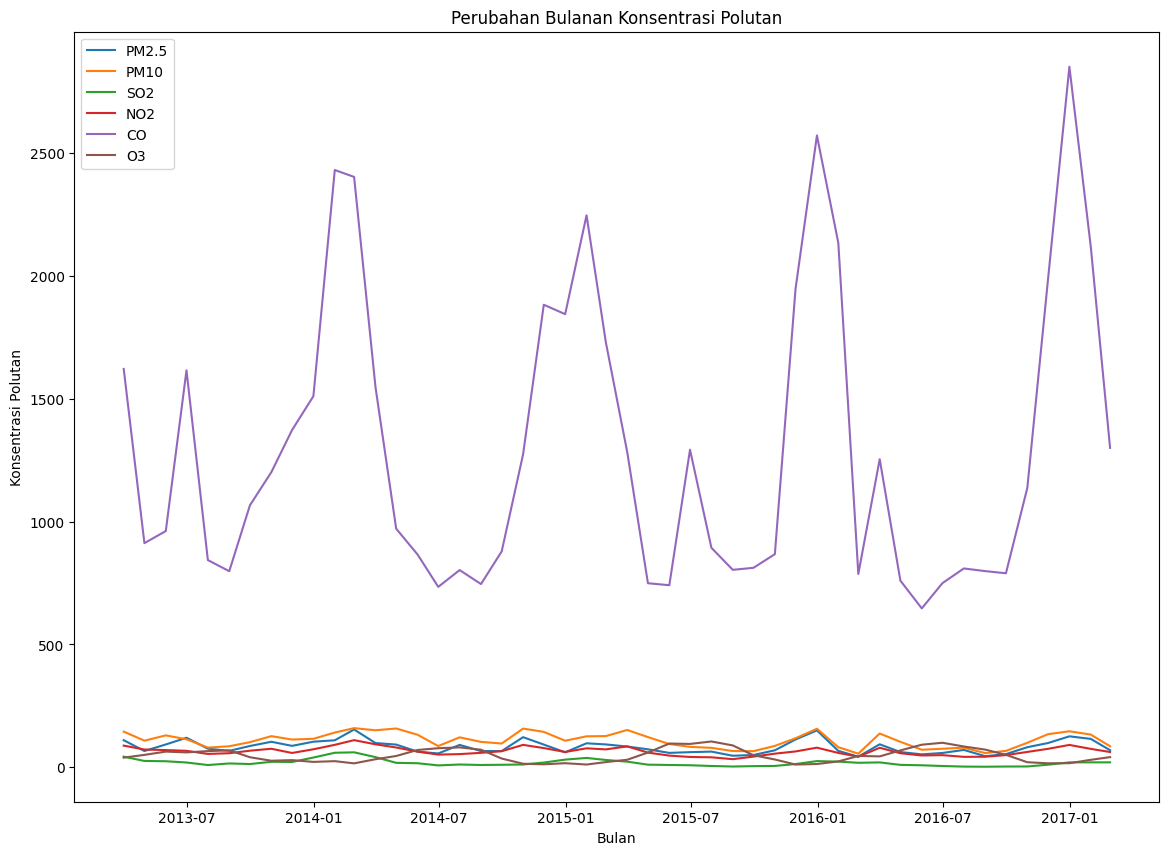

In [31]:
# Membuat kolom datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

# Hitung rata-rata bulanan untuk setiap polutan
monthly_avg = df[pollutants].resample('M').mean()

# Visualisasi perubahan bulanan setiap polutan
# Analisis Bulanan Rata-rata Polutan
plt.figure(figsize=(14, 10))
for pollutant in pollutants:
    plt.plot(monthly_avg.index, monthly_avg[pollutant], label=pollutant)

plt.title('Perubahan Bulanan Konsentrasi Polutan')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi Polutan')
plt.legend()
plt.show()


Analisis Musiman: Mengelompokkan data berdasarkan musim (misalnya: musim semi, musim panas, musim gugur, dan musim dingin) untuk melihat apakah ada perbedaan signifikan dalam kualitas udara di setiap musim.

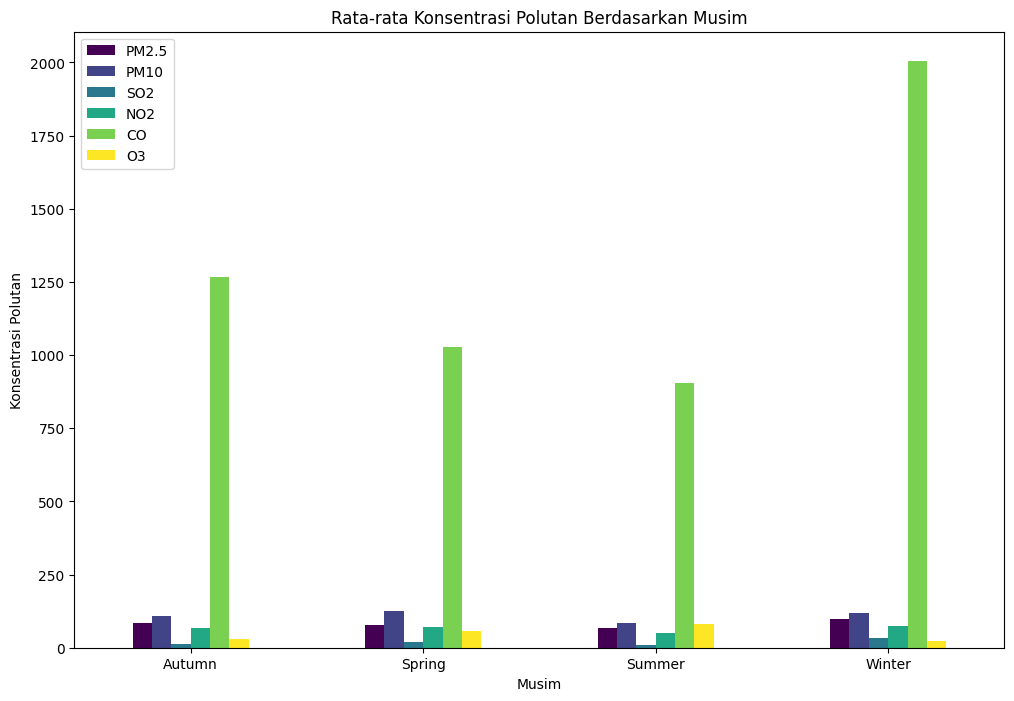

In [32]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df['season'] = df.index.month.map(get_season)
seasonal_avg = df.groupby('season')[pollutants].mean()

# Visualisasi musiman
seasonal_avg.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Rata-rata Konsentrasi Polutan Berdasarkan Musim')
plt.ylabel('Konsentrasi Polutan')
plt.xlabel('Musim')
plt.xticks(rotation=0)
plt.show()


Moving Average untuk Tren Jangka Panjang: Gunakan moving average (misalnya, 30 hari) untuk setiap polutan. Ini akan membantu menyaring fluktuasi harian dan memberikan pandangan yang lebih stabil tentang tren.

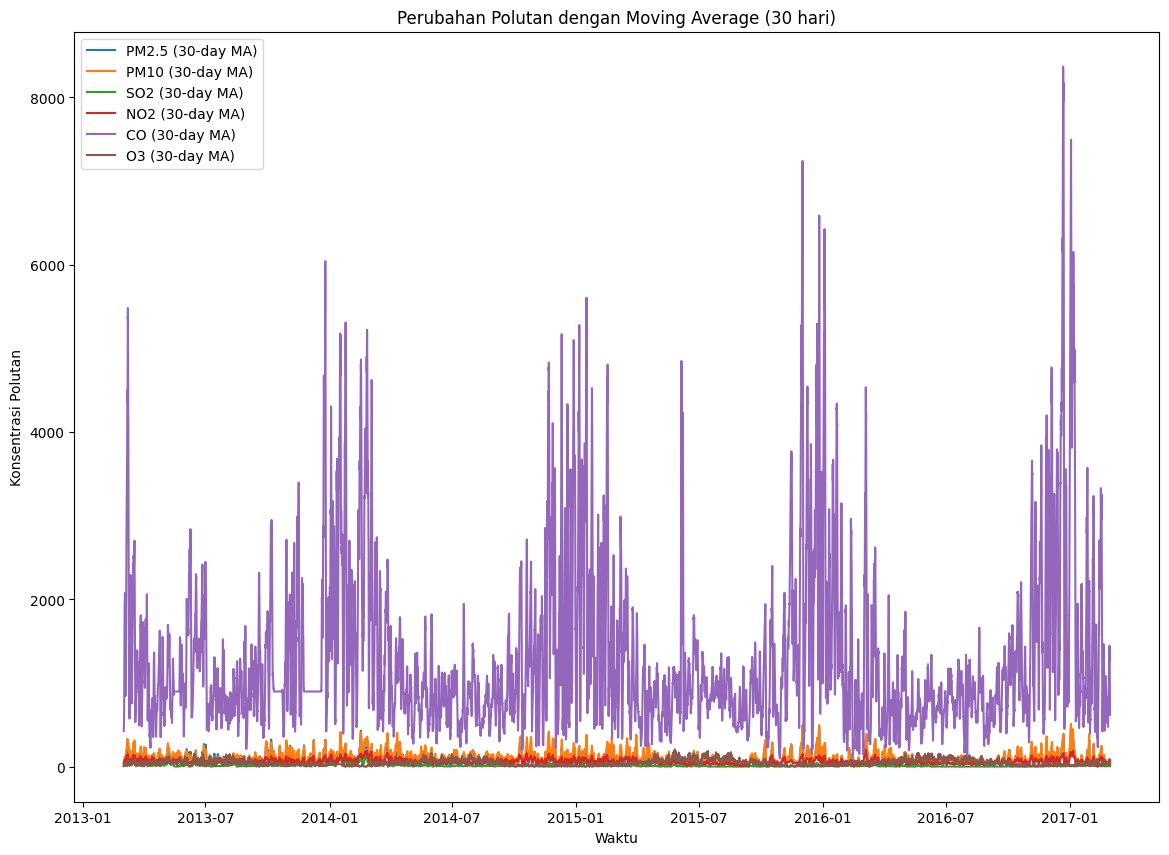

In [33]:
rolling_avg = df[pollutants].rolling(window=30).mean()

plt.figure(figsize=(14, 10))
for pollutant in pollutants:
    plt.plot(rolling_avg.index, rolling_avg[pollutant], label=f'{pollutant} (30-day MA)')

plt.title('Perubahan Polutan dengan Moving Average (30 hari)')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi Polutan')
plt.legend()
plt.show()


**Insight:**
- Dengan analisis ini dapat memperoleh pemahaman yang lebih baik tentang bagaimana kualitas udara berubah seiring waktu dan apa saja polutan yang dominan memengaruhi kualitas udara.

## Analisis Lanjutan (Opsional)

## Conclusion

- Polutan Utama yang Mempengaruhi Kualitas Udara
Dari distribusi dan statistik deskriptif, kita menemukan bahwa beberapa polutan seperti PM2.5 dan PM10 memiliki konsentrasi yang cukup tinggi dan fluktuasi yang signifikan. Polutan ini cenderung berkontribusi besar terhadap penurunan kualitas udara, terutama karena tingginya konsentrasi partikulat ini berbahaya bagi kesehatan pernapasan. Korelasi antar polutan menunjukkan bahwa beberapa polutan mungkin saling berhubungan, yang bisa berarti adanya sumber atau kondisi lingkungan yang sama yang mempengaruhi kadar polusi.

- Perubahan Kualitas Udara dari Waktu ke Waktu
Analisis tren jangka panjang dan moving average menunjukkan adanya fluktuasi signifikan pada kualitas udara dari waktu ke waktu. Rata-rata bulanan dan analisis musiman menunjukkan bahwa kualitas udara cenderung menurun di musim dingin dan gugur, kemungkinan besar karena kondisi cuaca yang lebih stabil dan rendahnya tingkat dispersi polutan.

- Pola Musiman dan Waktu Harian
Polutan seperti PM2.5 dan PM10 menunjukkan peningkatan pada musim-musim tertentu, yang bisa disebabkan oleh faktor cuaca atau aktivitas manusia yang lebih intens di musim-musim tersebut. Analisis berdasarkan jam dalam sehari juga menunjukkan bahwa konsentrasi polutan tertentu lebih tinggi pada waktu-waktu tertentu, misalnya pada pagi dan malam hari, yang mungkin berhubungan dengan aktivitas transportasi atau pemanasan ruangan.

- Secara keseluruhan, analisis ini menunjukkan bahwa polutan partikulat (PM2.5 dan PM10) merupakan faktor utama dalam penurunan kualitas udara, dan terdapat pola musiman yang jelas dalam fluktuasi konsentrasi polutan. Untuk mengurangi dampak buruk kualitas udara, tindakan yang ditargetkan pada polutan utama dan perbaikan kualitas udara di musim tertentu akan sangat bermanfaat